In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

method 1: pandas_datareader

In [2]:
import pandas_datareader as pdr
from datetime import datetime

Tesla = pdr.get_data_yahoo(symbols='TSLA',start=datetime(2021,1,1),end=datetime(2021,3,28))

In [3]:
Tesla.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2020-12-31  718.719971  691.119995  699.989990  705.669983  49649900   
2021-01-04  744.489990  717.190002  719.460022  729.770020  48638200   
2021-01-05  740.840027  719.200012  723.659973  735.109985  32245200   
2021-01-06  774.000000  749.099976  758.489990  755.979980  44700000   
2021-01-07  816.989990  775.200012  777.630005  816.039978  51498900   

             Adj Close  
Date                    
2020-12-31  705.669983  
2021-01-04  729.770020  
2021-01-05  735.109985  
2021-01-06  755.979980  
2021-01-07  816.039978

Visualize the price trend using the adjusted close price

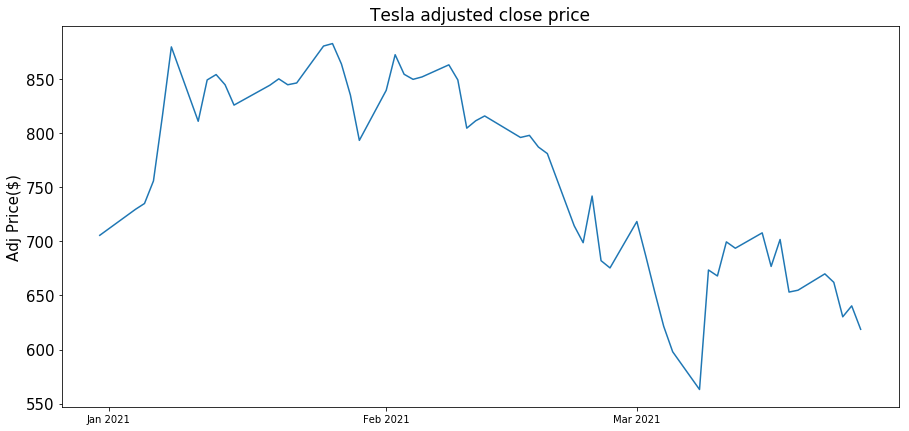

In [4]:
fig,ax = plt.subplots(figsize=(15,7))
ax.plot(Tesla.index.values,
    Tesla['Adj Close'].values,
    label = 'Adjusted close price'
    );
plt.title('Tesla adjusted close price',fontsize=17);
plt.yticks(fontsize=15);
plt.ylabel('Adj Price($)',fontsize=15);
# formatters' options
ax.xaxis.set_major_locator(MonthLocator())
#ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))


Method 2: YahooFinancials

In [5]:
from yahoofinancials import YahooFinancials

ticker = 'AAPL'
yahoo_financials = YahooFinancials(ticker)

In [6]:
AAPL_price = yahoo_financials.get_historical_price_data('2021-01-01', '2021-03-30', 'daily')

In [7]:
AAPL_price.keys()

dict_keys(['AAPL'])

In [8]:
AAPL_price['AAPL'].keys()

dict_keys(['eventsData', 'firstTradeDate', 'currency', 'instrumentType', 'timeZone', 'prices'])

In [9]:
AAPL_price['AAPL']['prices'][0]

{'date': 1609770600,
 'high': 133.61000061035156,
 'low': 126.76000213623047,
 'open': 133.52000427246094,
 'close': 129.41000366210938,
 'volume': 143301900,
 'adjclose': 129.2169189453125,
 'formatted_date': '2021-01-04'}

In [10]:
pd.DataFrame(AAPL_price['AAPL']['prices'][0],index=[0])

date        high         low        open       close     volume  \
0  1609770600  133.610001  126.760002  133.520004  129.410004  143301900   

     adjclose formatted_date  
0  129.216919     2021-01-04

In [11]:
price_df = pd.DataFrame()
for index,price in enumerate(AAPL_price['AAPL']['prices']):
    df = pd.DataFrame(price,index=[index])
    price_df = pd.concat([price_df,df],
                         axis=0,sort=False
                        )

In [12]:
price_df.head()

date        high         low        open       close     volume  \
0  1609770600  133.610001  126.760002  133.520004  129.410004  143301900   
1  1609857000  131.740005  128.429993  128.889999  131.009995   97664900   
2  1609943400  131.050003  126.379997  127.720001  126.599998  155088000   
3  1610029800  131.630005  127.860001  128.360001  130.919998  109578200   
4  1610116200  132.630005  130.229996  132.429993  132.050003  105158200   

     adjclose formatted_date  
0  129.216919     2021-01-04  
1  130.814514     2021-01-05  
2  126.411102     2021-01-06  
3  130.724655     2021-01-07  
4  131.852966     2021-01-08

In [13]:
price_df['formatted_date'].values[0]

'2021-01-04'

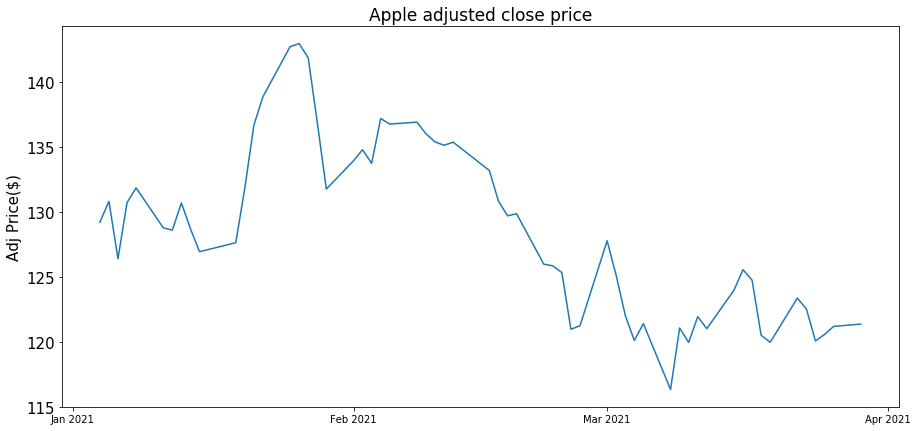

In [14]:
df = price_df
df['formatted_date'] = pd.to_datetime(df['formatted_date'])
fig,ax = plt.subplots(figsize=(15,7))
ax.plot(df.formatted_date.values,
    df['adjclose'].values,
    label = 'Adjusted close price'
    );
plt.title('Apple adjusted close price',fontsize=17);
plt.yticks(fontsize=15);
plt.ylabel('Adj Price($)',fontsize=15);
# formatters' options
ax.xaxis.set_major_locator(MonthLocator())
#ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))